# Introduction
## Customer Churn Prediction

**Customer churn prediction** is a method used by businesses to identify customers who are likely to stop using their products or services. Predicting customer churn helps companies take proactive measures to retain customers, improve customer satisfaction, and optimize marketing strategies. Here's a detailed explanation:

**Definition**
**Customer Churn**: Churn, also known as customer attrition, refers to the loss of customers over a specific period. It can be calculated as the percentage of customers who leave a company during a given time frame.

**Customer Churn Prediction:** This involves using historical data and machine learning techniques to identify patterns and factors that contribute to customers leaving. The goal is to predict which customers are at risk of churning so that preventive actions can be taken.

**Importance of Customer Churn Prediction**
**Revenue Retention:** Keeping existing customers is often more cost-effective than acquiring new ones. Predicting churn helps businesses retain revenue.
Customer Lifetime Value: By reducing churn, companies can increase the lifetime value of their customers.

**Marketing Optimization:** Identifying at-risk customers allows businesses to tailor their marketing efforts to retain those customers, improving the return on investment (ROI) for marketing campaigns.

**Customer Satisfaction:** Understanding why customers churn can provide insights into product or service issues, leading to improvements that enhance overall customer satisfaction.

**Process of Customer Churn Prediction**
Data Collection: Gather historical data on customer interactions, transactions, demographics, usage patterns, and other relevant features. This can include data from CRM systems, transaction databases, customer support logs, etc.

**Data Preprocessing:**

**Handling Missing Values:** Address any missing data points.

**Feature Engineering:** Create new features that may be relevant for prediction, such as tenure, usage frequency, etc.

**Encoding Categorical Variables:** Convert categorical variables into numerical values using techniques like one-hot encoding.

**Exploratory Data Analysis (EDA):** Analyze the data to understand relationships between features and identify important variables that might influence churn.

**Model Selection and Training:** Choose a suitable machine learning model. Common algorithms for churn prediction include:

**Logistic Regression:** Useful for binary classification problems.

**Decision Trees and Random Forests:** These are powerful and interpretable models for classification tasks.

**Support Vector Machines (SVM):** Effective in high-dimensional spaces.

**Gradient Boosting Machines (GBM):** Including XGBoost and LightGBM, which are popular for their accuracy.

**Neural Networks:** Can be used for more complex patterns in data.

**Model Evaluation:** Evaluate the model using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC to ensure its effectiveness in predicting churn.

**Model Deployment:** Implement the model in a production environment to make real-time predictions on customer churn.

**Actionable Insights:** Use the model's predictions to develop targeted retention strategies, such as personalized offers, improved customer service, and engagement initiatives.

We are going to build a basic model for predicting customer churn using [Telco Customer Churn dataset](https://www.kaggle.com/blastchar/telco-customer-churn). We are using some classification algorithm to model customers who have left, using Python tools such as pandas for data manipulation and matplotlib for visualizations.


**Let's get started.**

# Steps Involved to Predict Customer Churn
- Importing Libraries
- Loading Dataset
- Exploratory Data Analysis
- Outliers using IQR method
- Cleaning and Transforming Data
    - One-hot Encoding
    - Rearranging Columns
    - Feature Scaling
    - Feature Selection
- Prediction using Logistic Regression
- Prediction using Support Vector Classifier
- Prediction using Decision Tree Classifier
- Prediction using KNN Classifier

## Importing Libraries

First of all, we will import knwon necessary libraries.

In [4]:
#import platform
import pandas as pd
import sklearn
import numpy as np
import graphviz
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

## Loading Dataset
We use pandas to read the dataset and preprocess it.

In [5]:
df = pd.read_csv('/content/Telco-Customer-Churn.csv') # Load the dataset
df.shape

(7043, 21)

## Exploratory Data Analysis

In [6]:
df.head() # Display the first few rows of the dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.tail() # Display the last few rows of the dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


We have 2 types of features in the dataset: categorical (two or more values and without any order) and numerical. Most of the feature names are self-explanatory, except for:
 - Partner: whether the customer has a partner or not (Yes, No),
 - Dependents: whether the customer has dependents or not (Yes, No),
 - OnlineBackup: whether the customer has online backup or not (Yes, No, No internet service),
 - tenure: number of months the customer has stayed with the company,
 - MonthlyCharges: the amount charged to the customer monthly,
 - TotalCharges: the total amount charged to the customer.

There are 7043 customers in the dataset and 19 features without customerID (non-informative) and Churn column (target variable). Most of the categorical features have 4 or less unique values.

In [8]:
df.size

147903

In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Totalcharges is given as object datatype but it is float datatype

In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df.duplicated().sum()

0

#### Basic Data Cleaning:
As we have already observered in above cell that Totalcharges is given as object datatype but it is float datatype. We will fix it here.

In [14]:
df['TotalCharges'].dtype

dtype('O')

In [15]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [16]:
df['TotalCharges'].dtype

dtype('float64')

In [17]:
categorical_features = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
]
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
target = "Churn"

In [18]:
df.skew(numeric_only= True)

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

In [19]:
df.corr(numeric_only= True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


### Feature distribution

We plot distributions for numerical and categorical features to check for outliers and compare feature distributions with target variable.

#### Numerical features distribution

Numeric summarizing techniques (mean, standard deviation, etc.) don't show us spikes, shapes of distributions and it is hard to observe outliers with it. That is the reason we use histograms.

In [20]:
df[numerical_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

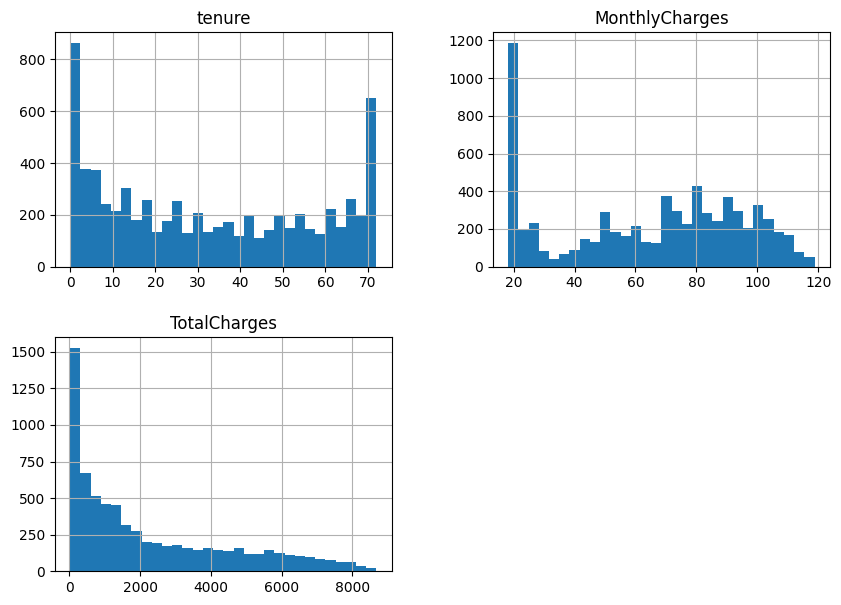

In [21]:
df[numerical_features].hist(bins=30, figsize=(10, 7))

We look at distributions of numerical features in relation to the target variable. We can observe that the greater TotalCharges and tenure are the less is the probability of churn.

array([<Axes: title={'center': 'tenure'}>,
       <Axes: title={'center': 'MonthlyCharges'}>,
       <Axes: title={'center': 'TotalCharges'}>], dtype=object)

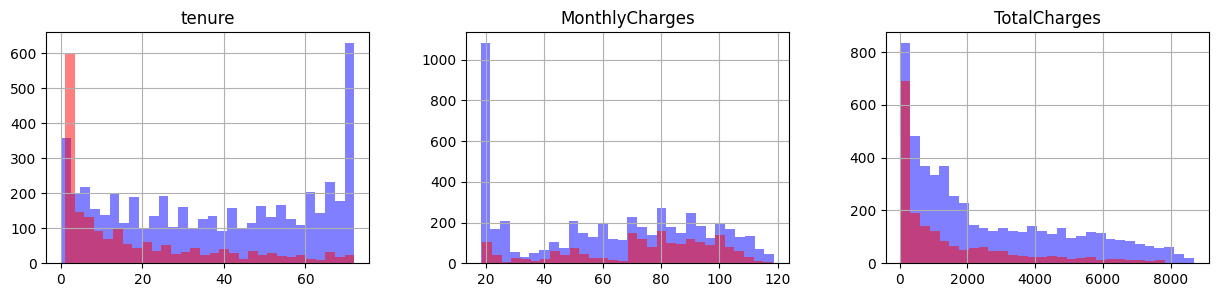

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
df[df.Churn == "No"][numerical_features].hist(bins=30, color="blue", alpha=0.5, ax=ax)
df[df.Churn == "Yes"][numerical_features].hist(bins=30, color="red", alpha=0.5, ax=ax)

#### Categorical feature distribution

To analyze categorical features, we use bar charts. We observe that Senior citizens and customers without phone service are less represented in the data.

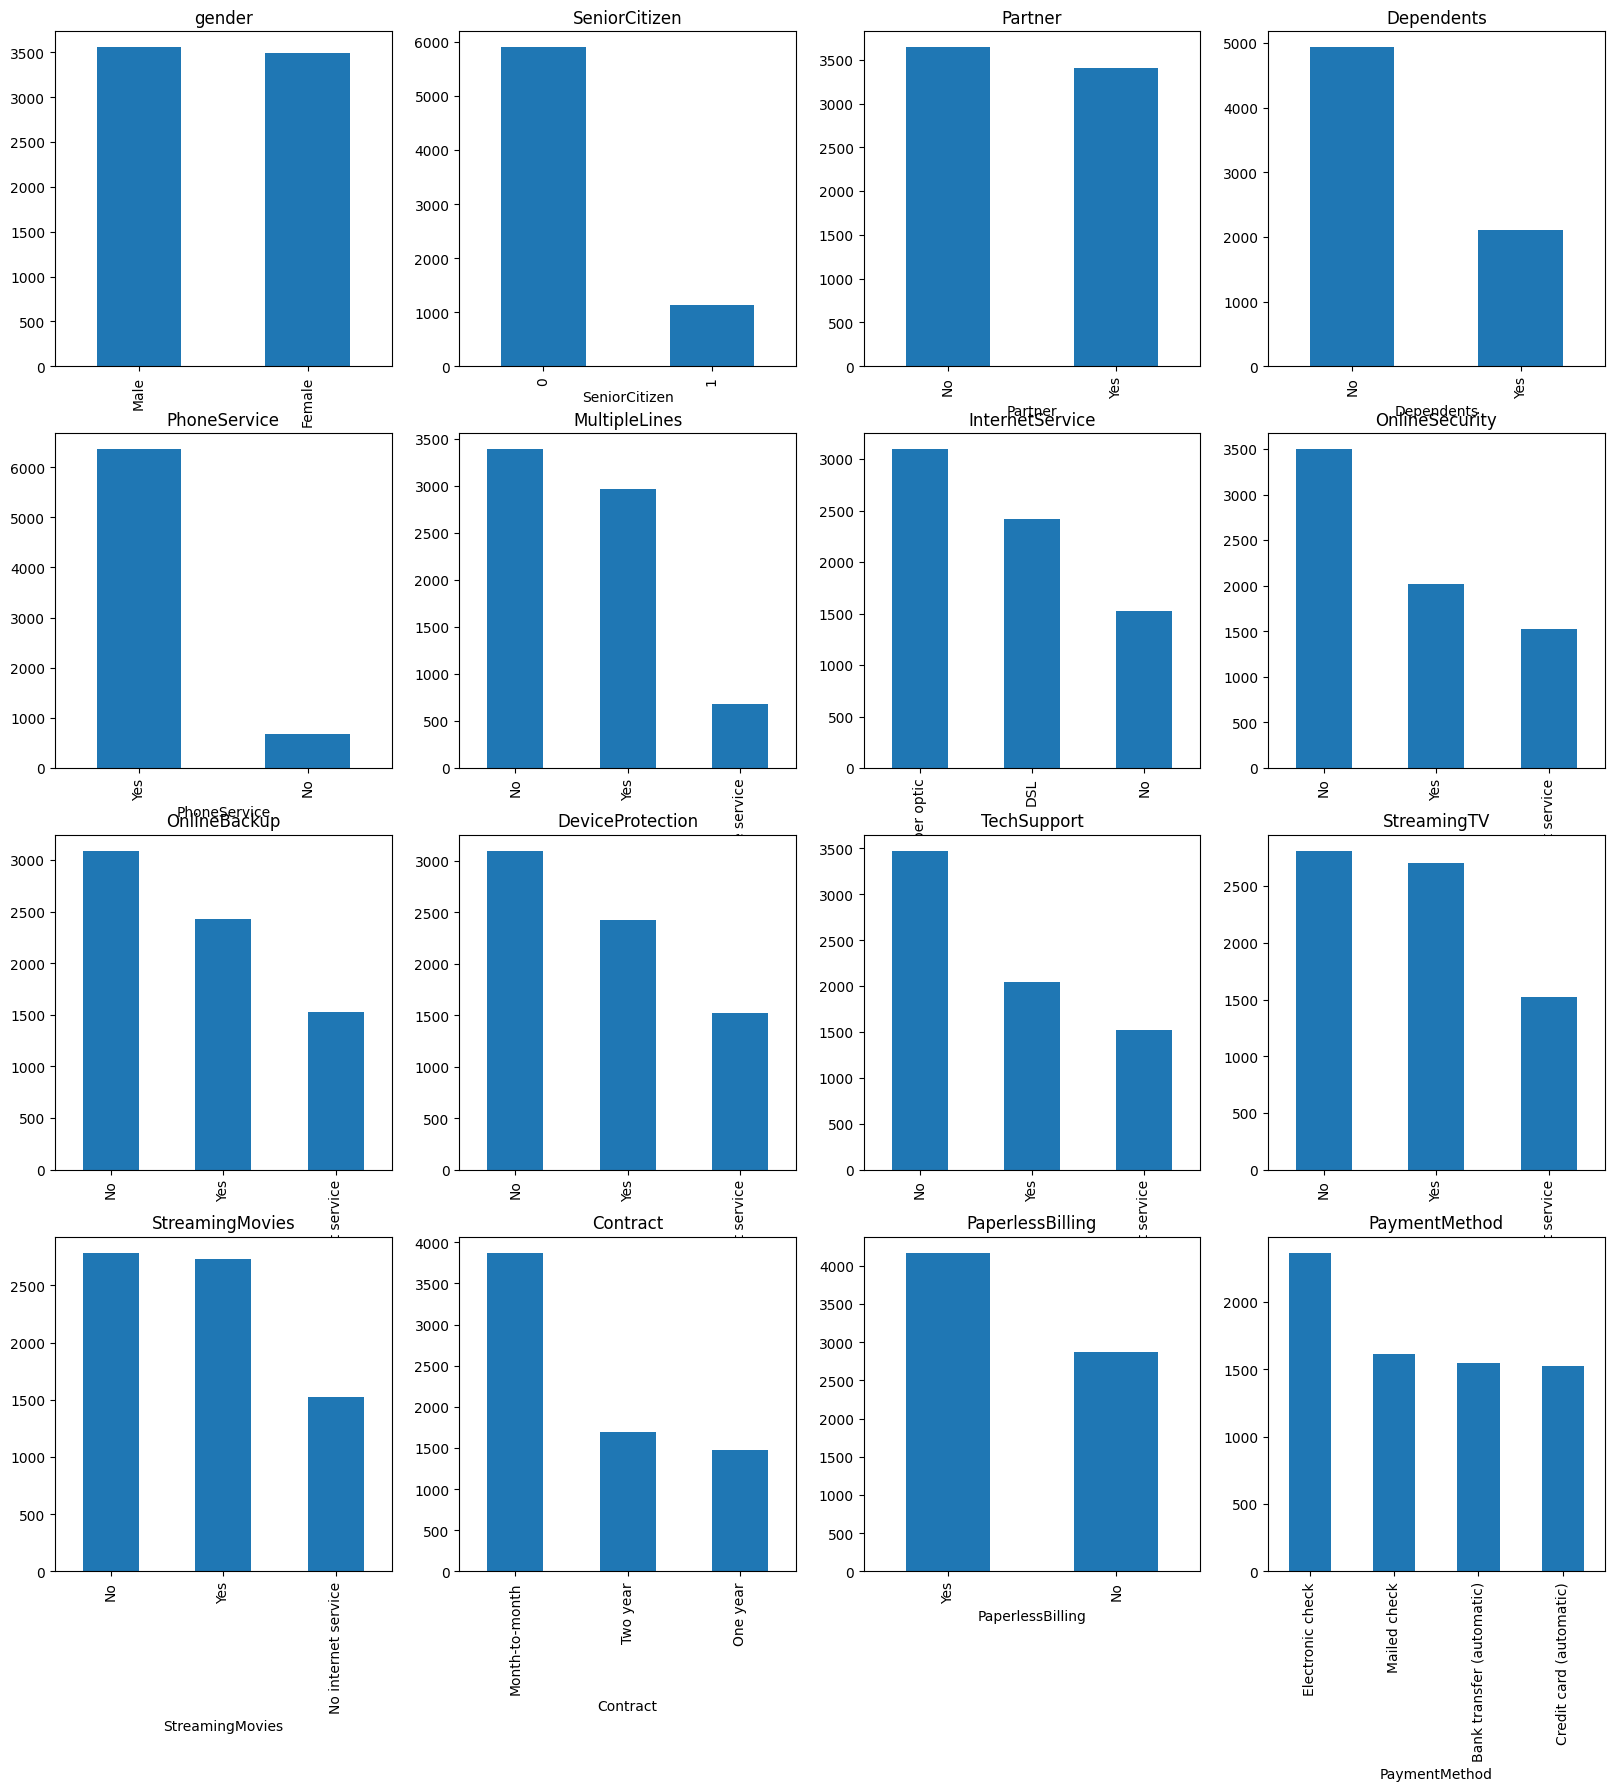

In [23]:
ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS,COLS, figsize=(20,20))
row, col = 0, 0,
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    df[categorical_feature].value_counts().plot(kind='bar', ax=ax[row, col]).set_title(categorical_feature)

The next step is to look at categorical features in relation to the target variable. We do this only for contract feature. Users who have a month-to-month contract are more likely to churn than users with long term contracts.

Text(0.5, 1.0, 'churned')

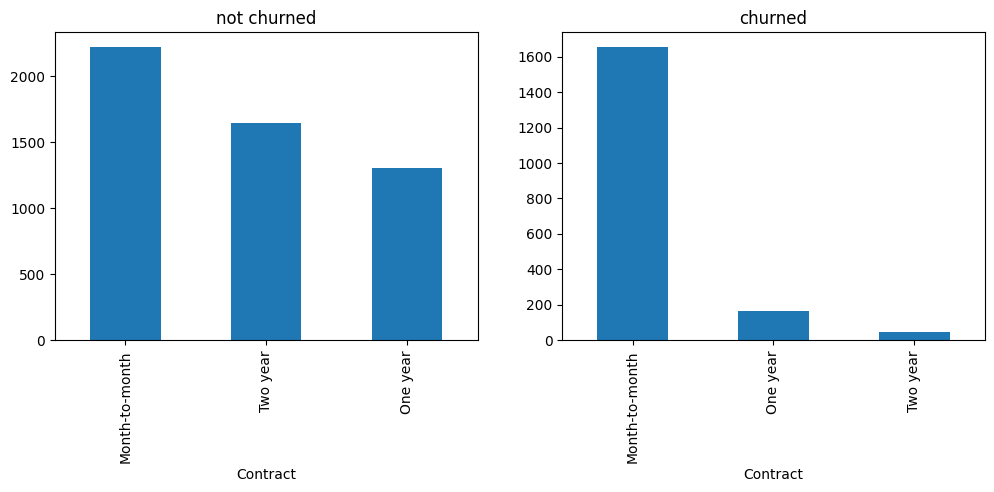

In [24]:
feature = 'Contract'
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
df[df.Churn == "No"][feature].value_counts().plot(kind='bar', ax=ax[0]).set_title('not churned')
df[df.Churn == "Yes"][feature].value_counts().plot(kind='bar', ax=ax[1]).set_title('churned')

### Target variable distribution

Text(0.5, 1.0, 'churned')

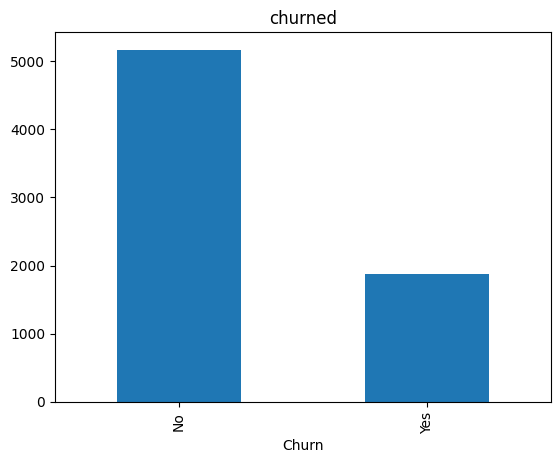

In [25]:
df[target].value_counts().plot(kind='bar').set_title('churned')

Target variable distribution shows that we are dealing with an imbalanced problem as there are many more non-churned as compare to churned users. The model would achieve high accuracy as it would mostly predict majority class - users who didn't churn in our example.

Few things we can do to minimize the influence of imbalanced dataset:
- resample data,
- collect more samples,
- use precision and recall as accuracy metrics.

## Outliers Analysis with IQR Method

In [26]:
x = ['tenure','MonthlyCharges']
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in x:
    count_outliers(df,i)

No outliers in tenure
No outliers in MonthlyCharges


## Cleaning and Transforming Data

In [27]:
df.drop(['customerID'],axis = 1,inplace = True)

In [28]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Dropped customerID because it is not needed

### On Hot Encoding

In [29]:
df1=pd.get_dummies(data=df,columns=['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'], drop_first=True)

In [30]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [31]:
df1.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

### Rearranging Columns

In [32]:
df1 = df1[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
        'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check','Churn_Yes']]

In [33]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [34]:
df1.shape

(7043, 31)

In [35]:
from sklearn.impute import SimpleImputer

# The imputer will replace missing values with the mean of the non-missing values for the respective columns

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

df1.TotalCharges = imputer.fit_transform(df1["TotalCharges"].values.reshape(-1, 1))

### Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
scaler.fit(df1.drop(['Churn_Yes'],axis = 1))
scaled_features = scaler.transform(df1.drop('Churn_Yes',axis = 1))

### Feature Selection

In [38]:
from sklearn.model_selection import train_test_split
X = scaled_features
Y = df1['Churn_Yes']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=44)

## Prediction using Logistic Regression

- **Logistic Regression** provides probabilistic outputs, which can be useful for classification problems with binary outcomes.
- It is relatively simple and efficient, especially for linearly separable data.






In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score ,confusion_matrix

logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression()

In [40]:
predLR = logmodel.predict(X_test)

In [41]:
predLR

array([False, False, False, ..., False, False, False])

In [42]:
Y_test

5616    False
2937    False
1355    False
5441     True
3333    False
        ...  
2797     True
412     False
174     False
5761    False
5895    False
Name: Churn_Yes, Length: 2113, dtype: bool

In [43]:
print(classification_report(Y_test, predLR))

              precision    recall  f1-score   support

       False       0.84      0.90      0.87      1557
        True       0.65      0.53      0.58       556

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



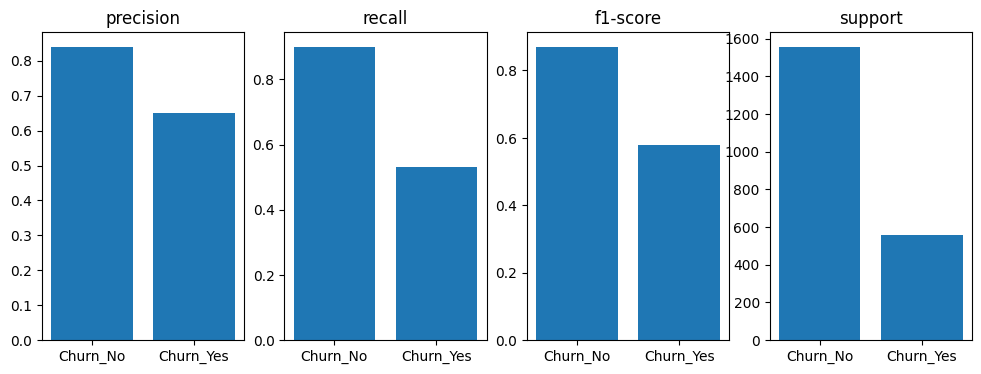

In [44]:
# calculate the classification report
report = classification_report(Y_test, predLR, target_names=['Churn_No', 'Churn_Yes'])

# split the report into lines
lines = report.split('\n')

# split each line into parts
parts = [line.split() for line in lines[2:-5]]

# extract the metrics for each class
class_metrics = dict()
for part in parts:
    class_metrics[part[0]] = {'precision': float(part[1]), 'recall': float(part[2]), 'f1-score': float(part[3]), 'support': int(part[4])}

# create a bar chart for each metric
fig, ax = plt.subplots(1, 4, figsize=(12, 4))
metrics = ['precision', 'recall', 'f1-score', 'support']
for i, metric in enumerate(metrics):
    ax[i].bar(class_metrics.keys(), [class_metrics[key][metric] for key in class_metrics.keys()])
    ax[i].set_title(metric)

# display the plot
plt.show()

In [45]:
confusion_matrix_LR = confusion_matrix(Y_test, predLR)

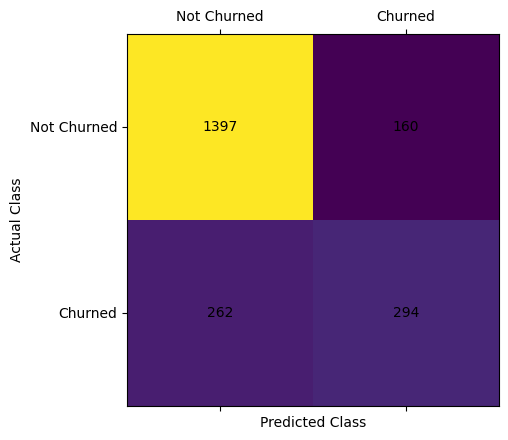

In [46]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix(Y_test, predLR))

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_LR[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [47]:
logmodel.score(X_train, Y_train)

0.8062880324543611

In [48]:
accuracy_score(Y_test, predLR)

0.8002839564600095

In [49]:
roc_auc = roc_auc_score(Y_test, predLR)

In [71]:
print(f'ROC-AUC Score: {roc_auc}')

ROC-AUC Score: 0.7130076285792175


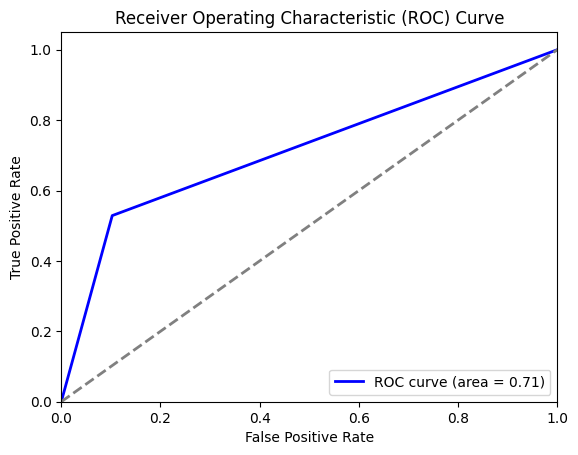

In [72]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, predLR)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Prediction using Support Vector Classifier

- **SVM** is particularly effective in high-dimensional spaces and when the number of dimensions exceeds the number of samples.
- It is also effective in cases where the decision boundary is non-linear by using kernel tricks.



In [50]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train)
y_pred_svc = svc.predict(X_test)

In [51]:
print(classification_report(Y_test, y_pred_svc))

              precision    recall  f1-score   support

       False       0.83      0.92      0.87      1557
        True       0.67      0.48      0.56       556

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.71      2113
weighted avg       0.79      0.80      0.79      2113



In [52]:
confusion_matrix_svc = confusion_matrix(Y_test, y_pred_svc)

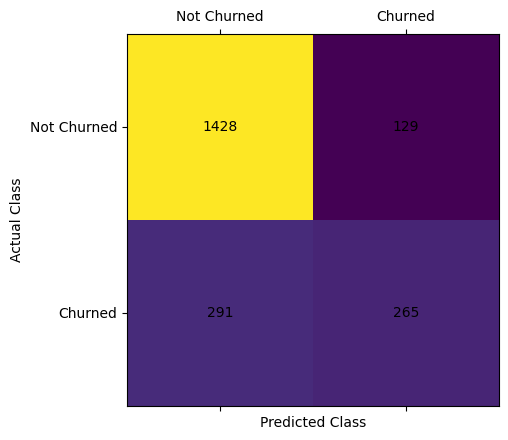

In [53]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_svc)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_svc[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [54]:
svc.score(X_train,Y_train)

0.8170385395537525

In [55]:
accuracy_score(Y_test, y_pred_svc)

0.8012304779933743

In [73]:
roc_auc = roc_auc_score(Y_test, y_pred_svc)
print(f'ROC-AUC Score: {roc_auc}')

ROC-AUC Score: 0.6968835336355192


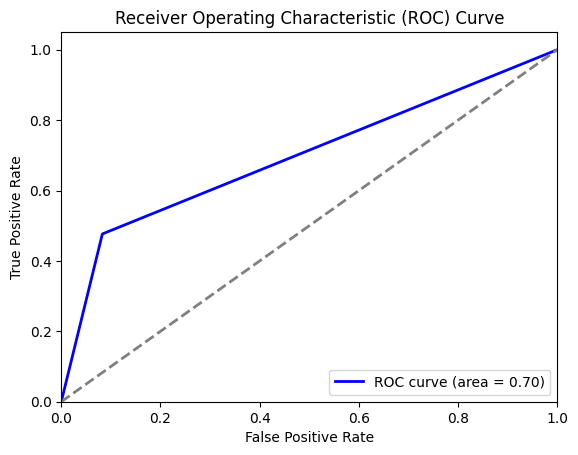

In [74]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_svc)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Prediction using Decision Tree Classifier

- **Decision trees** are particularly effective with datasets that have a clear hierarchical structure, where decisions can be made based on a series of binary questions about the features.
- They excel in situations where the
relationships between features and the target variable are non-linear and complex, as they can capture intricate patterns by splitting the data into smaller, more homogeneous groups.
- Furthermore, decision trees are inherently interpretable, making them valuable in domains where model transparency and the ability to explain predictions are critical.

In [56]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train, Y_train)
y_pred_dtc = dtc.predict(X_test)

In [57]:
print(classification_report(Y_test, y_pred_dtc))

              precision    recall  f1-score   support

       False       0.82      0.81      0.81      1557
        True       0.48      0.49      0.48       556

    accuracy                           0.72      2113
   macro avg       0.65      0.65      0.65      2113
weighted avg       0.73      0.72      0.73      2113



In [58]:
confusion_matrix_dtc = confusion_matrix(Y_test, y_pred_dtc)

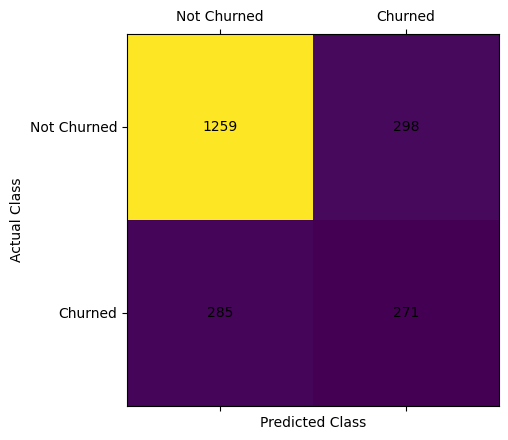

In [59]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_dtc)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_dtc[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [60]:
dtc.score(X_train,Y_train)

0.9987829614604462

In [61]:
accuracy_score(Y_test, y_pred_dtc)

0.7240889730241363

In [75]:
roc_auc = roc_auc_score(Y_test, y_pred_dtc)
print(f'ROC-AUC Score: {roc_auc}')

ROC-AUC Score: 0.6480081830489366


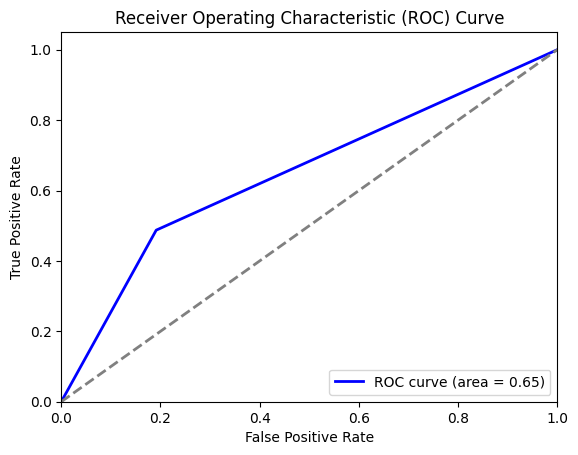

In [76]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_dtc)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Prediction using KNN Classifier

- **KNN** is a non-parametric method that is effective when the data is well-distributed and distance metrics are meaningful.
- It is sensitive to the choice of the number of neighbors (k) and the distance metric used.



In [62]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=30)

In [63]:
pred_knn = knn.predict(X_test)

In [64]:
error_rate= []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

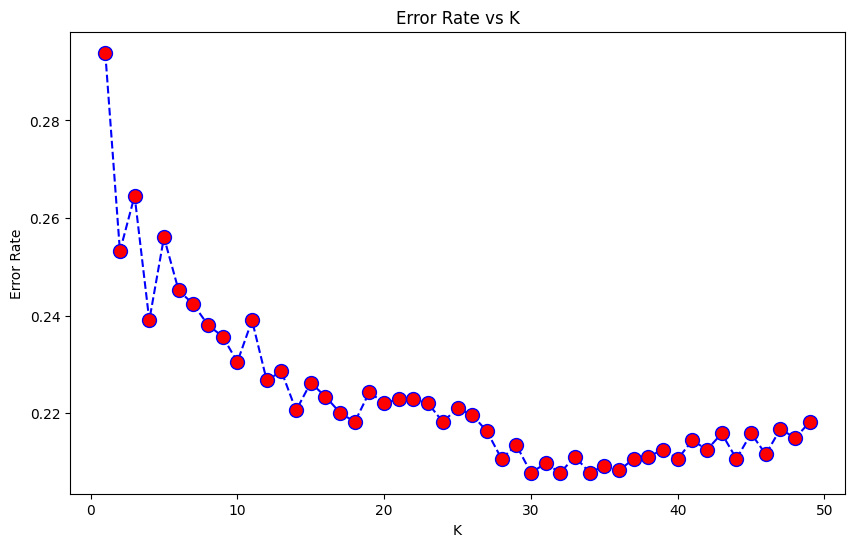

In [65]:
plt.figure(figsize = (10,6))
plt.plot(range(1,50),error_rate,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [66]:
print(classification_report(Y_test,pred_knn))

              precision    recall  f1-score   support

       False       0.84      0.88      0.86      1557
        True       0.62      0.55      0.58       556

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.79      0.79      0.79      2113



In [67]:
confusion_matrix_knn = confusion_matrix(Y_test,pred_knn)

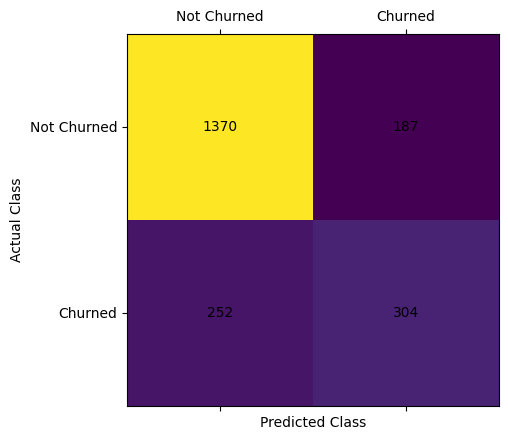

In [68]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_knn)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_knn[i, j], ha='center', va='center')

# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [69]:
knn.score(X_train,Y_train)

0.8016227180527383

In [70]:
accuracy_score(Y_test, pred_knn)

0.792238523426408

In [77]:
roc_auc = roc_auc_score(Y_test, pred_knn)
print(f'ROC-AUC Score: {roc_auc}')

ROC-AUC Score: 0.7133299141033993


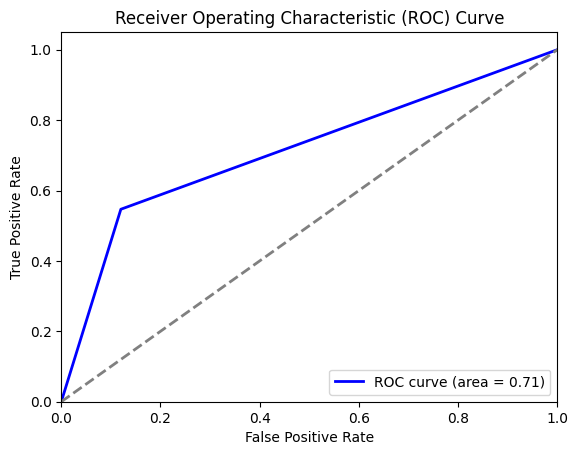

In [78]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, pred_knn)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Conclusion
By exploring different machine learning algorithms and carefully preprocessing the data, we can improve model performance and obtain more reliable predictions. Decision Trees, Random Forests, SVMs, Logistic Regression, and KNN each have their strengths and can be chosen based on the specific problem and dataset characteristics. Feature scaling and dimensionality reduction techniques like PCA can further enhance the performance of these algorithms.